# Import data 

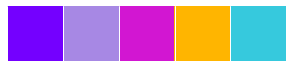

In [387]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Color Palette
custom_colors = ['#7400ff', '#a788e4', '#d216d2', '#ffb500', '#36c9dd']
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

# set size
sns.set(rc= {"figure.figsize": (8, 8)})

In [218]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/CaseStudyDataCampCertification/travel_insurance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [219]:
df.head()


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# FRIST LOOK 

In [220]:
df.rename(columns={"Employment Type": "EmploymentType"}, inplace=True)

In [221]:
map_1 = {"Yes":1, "No":0}
df.GraduateOrNot.replace(map_1, inplace=True)
df.FrequentFlyer.replace(map_1, inplace=True)
df.EverTravelledAbroad.replace(map_1, inplace=True)

 `GraduateOrNot`, `FrequentFlyer`  and `EverTravelledAbroad`
are now binary -> 1 or 0 

In [222]:
df.describe(include='all')

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Private Sector/Self Employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,29.650226,NaN,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,NaN,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,NaN,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,NaN,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,NaN,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,NaN,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000


# Get know your sample 

Focus on 3 metrics :
+ FrequentFlyer	or not 
+ EverTravelledAbroad or not 
+	TravelInsurance or not



The sample represents people who got a quote 

we don't have data for people that were not given quotes


Churn rate : mean `TravelInsurance`  -> Prob of getting a insurance given that you received a quote 


## Age

In [223]:
df.Age.value_counts(normalize=True)

28    0.254655
34    0.133870
31    0.117765
29    0.096628
33    0.074484
26    0.074484
25    0.073478
27    0.065929
32    0.045798
30    0.032713
35    0.030196
Name: Age, dtype: float64

In [224]:
df.groupby("Age")[["TravelInsurance"]].mean()

,TravelInsurance
Age,
25,0.630137
26,0.500000
27,0.206107
28,0.207510
29,0.265625
30,0.430769
31,0.320513
32,0.208791
33,0.527027


In [225]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates.
				Size is the amount of bootstrap samples.
				Return a statistic from each a.k.a. bootstrap replicates"""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
      bs = np.random.choice(data, len(data))
      bs_replicates[i] = func(bs)

    return bs_replicates
    bs_reps = draw_bs_reps(x, np.mean, size=1000)
    x= df[df.Age.isin(ages)].TravelInsurance
    x.mean()
    np.percentile(bs_reps, [2.5,97.5])

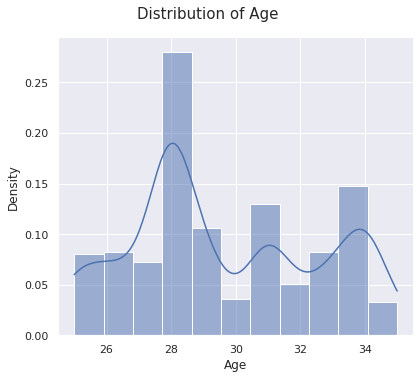

In [226]:
plot = sns.displot(data=df, x= "Age", kind="hist", stat="density", kde=True, bins = 11,aspect=1.2 )
plot.fig.suptitle("Distribution of Age ", fontsize =15 , y=1.05 )
plot

Is there a relation between churn and representation rate in sample? 

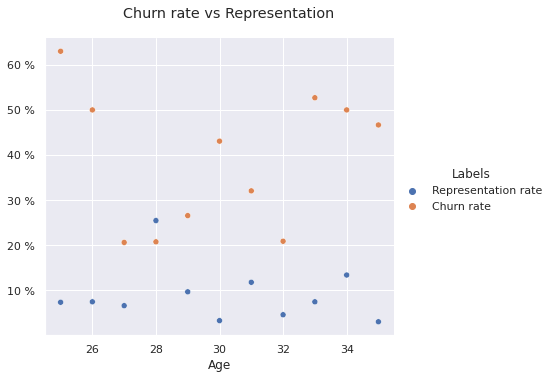

In [341]:
x = df.groupby("Age").count() / len(df)
y = df.groupby("Age").mean()
data = pd.concat(      [ x["GraduateOrNot"],y["TravelInsurance"]],axis=1    ).reset_index().melt(id_vars="Age")
map = {"GraduateOrNot":"Representation rate", "TravelInsurance":"Churn rate"}
data.variable.replace(map, inplace=True)
data.rename(columns={"variable":"Labels"}, inplace=True)
plot= sns.relplot(data=data,x="Age", y = "value", hue = "Labels", kind="scatter", aspect=1.2)
plot.fig.suptitle("Churn rate vs Representation             ", y=1.05)
plot.set(ylabel="")
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],["10 %","20 %","30 %","40 %","50 %","60 %" ])
plt.show()

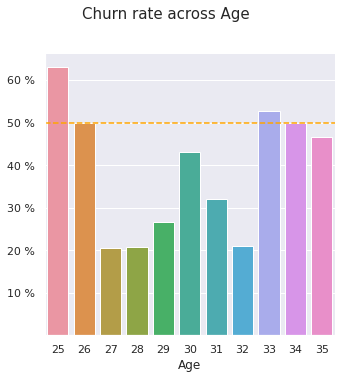

In [351]:
plot = sns.catplot(data=data, x= "Age",y="value",col= "Labels", col_order=["Churn rate"] ,kind="bar")
plot.fig.suptitle("Churn rate across Age ", fontsize =15 , y=1.05 )
plot.set_titles("")
plot.set(ylabel="")
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],["10 %","20 %","30 %","40 %","50 %","60 %" ])
plt.axhline ( 0.50, 0,1, color="orange", linestyle="--")
plt.show()


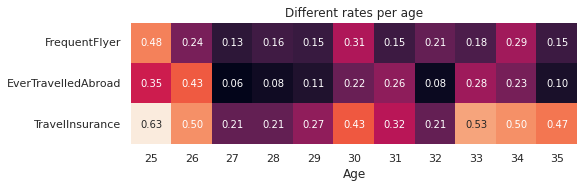

In [229]:
data = df.groupby("Age").agg({"FrequentFlyer":"mean","EverTravelledAbroad":"mean","TravelInsurance":"mean"}).reset_index()
data.set_index("Age", inplace=True)

hm = sns.heatmap(data.T, 
									cbar=False, 
									annot=True, 
									square=True, 
									fmt='.2f', 
									annot_kws={'size': 10})

plt.title("Different rates per age")
plt.show()

In [230]:
data.sort_values(by="TravelInsurance", ascending=False)

,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,,,
25,0.479452,0.349315,0.630137
33,0.175676,0.283784,0.527027
26,0.236486,0.432432,0.500000
34,0.289474,0.233083,0.500000
35,0.150000,0.100000,0.466667
30,0.307692,0.215385,0.430769
31,0.153846,0.264957,0.320513
29,0.145833,0.109375,0.265625
32,0.208791,0.076923,0.208791


## Conclusion from Age
Age ranges from 25-35 years

25 % are 28 y old

13 % are 34 y old

31 % are 31 y old

least represented are 30 and 35 with about 3%

Ages with higest churn  : 33,25 and 34. Ages 25 and 33 have 50% churn rate

deprecated :
"""
If we assume there is no relationship then the distribution of people who bougth an insurance would follow close to a binomial distribution. In this scenario we would expect a 50 % churn. Anything bellow this is I'll reject since there has been budget cuts.  
"""

Up untill now focus on ages 33,25 and 34 is a resonable decision. But I'm also taken under considerations ages 25 and 33.

For the other 


I did a vizual test to see if churn rate was effected by representation and I conclude it didn't.





## Employment type

In [231]:
df.EmploymentType.value_counts(normalize=True)

Private Sector/Self Employed    0.713135
Government Sector               0.286865
Name: EmploymentType, dtype: float64

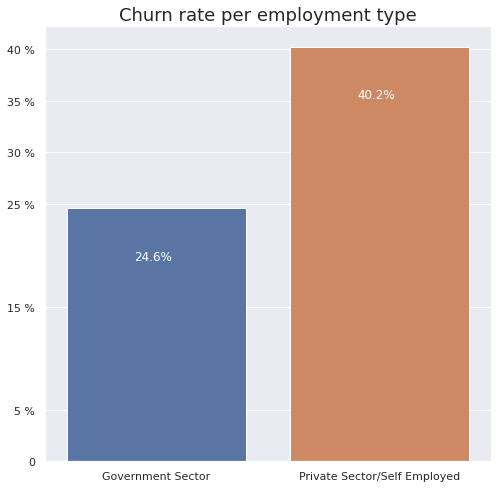

In [388]:
data=df.groupby("EmploymentType").mean()["TravelInsurance"].reset_index()
plot =sns.barplot(data= data, x= "EmploymentType",y="TravelInsurance" )
plot.text(1-0.1,data.iloc[1,1]-0.05, str(round(data.iloc[1,1]*100,1))+"%",fontdict={"fontsize":12,"color":"w"  })
plot.text(-0.1,data.iloc[0,1]-0.05, str(round(data.iloc[0,1]*100,1))+"%",fontdict={"fontsize":12,"color":"w"  })
plt.title("Churn rate per employment type", fontdict={"size":18})
plt.ylabel("")
plt.xlabel("")
plt.yticks([0,0.05,0.15,0.25,0.3,0.35,0.4], ["0","5 %","15 %","25 %","30 %","35 %","40 %"])
plt.show()

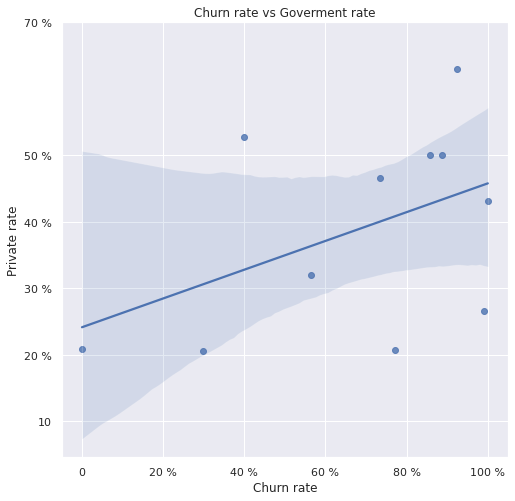

In [233]:
map = {"Private Sector/Self Employed": 1,"Government Sector":0 }
data = df.copy()
data.EmploymentType.replace(map, inplace=True)
y = data.groupby("Age").mean()[["TravelInsurance","EmploymentType" ]].reset_index()
plot= sns.regplot(data=y,y="TravelInsurance", x = "EmploymentType")
#plot.fig.suptitle("Churn rate vs Representation             ", y=1.05)
plt.title("Churn rate vs Goverment rate")
plt.xlabel("Churn rate")
plt.ylabel("Private rate")
plt.xticks([0.0,0.2,0.4,0.6,0.8,1],["0","20 %","40 %","60 %","80 %","100 %"])
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.7],["10","20 %","30 %","40 %","50 %","70 %"])

#plt.yticks([0.1,0.2,0.3,0.4,0.5,100],["10 %","20 %","30 %","40 %","100 %"])
plt.show()

In [234]:
from scipy.stats import linregress

slope , inter,r, pvalue, std = linregress(y.EmploymentType,y.TravelInsurance  )

print("Slope :", round(slope,2) ,"and intercept:",  round(inter,2)  , "With p-value :",round(pvalue,2)," and a r-value of ", round(r,2) )

Slope : 0.22 and intercept: 0.24 With p-value : 0.15  and a r-value of  0.46


In [235]:
y.sort_values(by="EmploymentType",ascending=False)

,Age,TravelInsurance,EmploymentType
5,30,0.430769,1.000000
4,29,0.265625,0.989583
0,25,0.630137,0.924658
9,34,0.500000,0.887218
1,26,0.500000,0.858108
3,28,0.207510,0.770751
10,35,0.466667,0.733333
6,31,0.320513,0.564103
8,33,0.527027,0.398649
2,27,0.206107,0.297710


In [236]:
data=df.groupby(["Age","EmploymentType"]).mean()["TravelInsurance"].reset_index()
data.sort_values(by="TravelInsurance", ascending=False)

,Age,EmploymentType,TravelInsurance
15,33,Private Sector/Self Employed,0.728814
1,25,Private Sector/Self Employed,0.651852
16,34,Government Sector,0.533333
3,26,Private Sector/Self Employed,0.519685
18,35,Government Sector,0.500000
17,34,Private Sector/Self Employed,0.495763
19,35,Private Sector/Self Employed,0.454545
12,31,Private Sector/Self Employed,0.439394
10,30,Private Sector/Self Employed,0.430769
14,33,Government Sector,0.393258


In [237]:
ages= [25,26,30,33,34,35]

data=df[df.Age.isin(ages)].groupby(["Age","EmploymentType"]).mean()["TravelInsurance"].reset_index()
data.sort_values(by="TravelInsurance", ascending=False)

,Age,EmploymentType,TravelInsurance
6,33,Private Sector/Self Employed,0.728814
1,25,Private Sector/Self Employed,0.651852
7,34,Government Sector,0.533333
3,26,Private Sector/Self Employed,0.519685
9,35,Government Sector,0.500000
8,34,Private Sector/Self Employed,0.495763
10,35,Private Sector/Self Employed,0.454545
4,30,Private Sector/Self Employed,0.430769
5,33,Government Sector,0.393258
2,26,Government Sector,0.380952


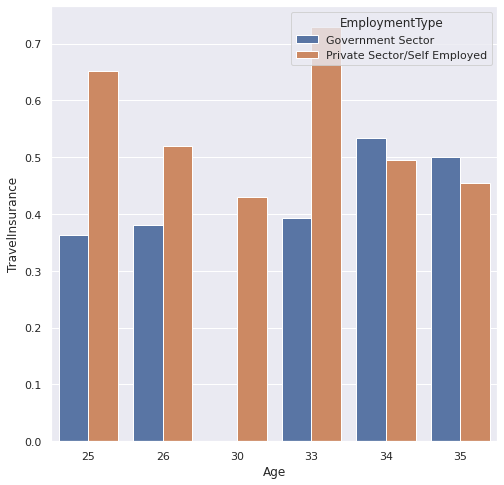

In [238]:
plot =sns.barplot(data= data, hue= "EmploymentType",y="TravelInsurance" , x="Age",)


## Employment type Conclusion

71 % of subjects work in the private sector or self employed

40 % of those bought insurance 

Goverment employees rate = 24 %

Out of the ages we picked out before 25,33 and 26 who work in the Private Sector or are Self Employed	have a higer churn rate

ages 34 and 35 who work for the Government  have just  above 50 % churn

## Graduate Or Not

In [239]:
df.GraduateOrNot.value_counts(normalize=True)

1    0.851535
0    0.148465
Name: GraduateOrNot, dtype: float64

In [240]:
data=df.groupby("GraduateOrNot").mean()["TravelInsurance"].reset_index()
data

,GraduateOrNot,TravelInsurance
0,0,0.335593
1,1,0.361111


In [241]:

data=df.groupby(["Age","GraduateOrNot"]).mean()["TravelInsurance"].reset_index()
data.sort_values(by="TravelInsurance", ascending=False)

,Age,GraduateOrNot,TravelInsurance
1,25,1,0.846154
13,33,1,0.530612
15,34,1,0.502041
17,35,1,0.500000
2,26,1,0.500000
14,34,0,0.476190
16,35,0,0.454545
8,30,0,0.430769
0,25,0,0.382353
10,31,1,0.376884


when combine age and Graduate level all churn above 50 % have Graduate degree

In [242]:
data=df[df.Age.isin(ages)].groupby(["Age","GraduateOrNot"]).mean()["TravelInsurance"].reset_index()
data.sort_values(by="TravelInsurance", ascending=False)

,Age,GraduateOrNot,TravelInsurance
1,25,1,0.846154
5,33,1,0.530612
7,34,1,0.502041
2,26,1,0.500000
9,35,1,0.500000
6,34,0,0.476190
8,35,0,0.454545
3,30,0,0.430769
0,25,0,0.382353
4,33,0,0.000000


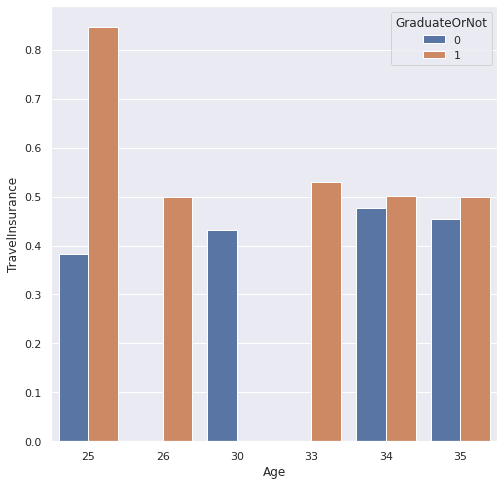

In [243]:
sns.barplot(data=data,x="Age", y= "TravelInsurance", hue ="GraduateOrNot"  )

In [244]:
data=df.groupby(["EmploymentType","GraduateOrNot"]).mean()["TravelInsurance"].reset_index()
data.sort_values(by="TravelInsurance", ascending=False)

,EmploymentType,GraduateOrNot,TravelInsurance
3,Private Sector/Self Employed,1,0.403945
2,Private Sector/Self Employed,0,0.394422
1,Government Sector,1,0.266160
0,Government Sector,0,0.000000


In [245]:
data=df[df.Age.isin([25,26,30,33,34,35])].groupby(["Age","EmploymentType","GraduateOrNot"]).mean()["TravelInsurance"].reset_index()
data.sort_values(by="TravelInsurance", ascending=False)

,Age,EmploymentType,GraduateOrNot,TravelInsurance
2,25,Private Sector/Self Employed,1,0.925373
8,33,Private Sector/Self Employed,1,0.728814
9,34,Government Sector,1,0.533333
4,26,Private Sector/Self Employed,1,0.519685
12,35,Government Sector,1,0.500000
11,34,Private Sector/Self Employed,1,0.497674
10,34,Private Sector/Self Employed,0,0.476190
13,35,Private Sector/Self Employed,0,0.454545
5,30,Private Sector/Self Employed,0,0.430769
7,33,Government Sector,1,0.397727


In [246]:
data=df.groupby(["Age","GraduateOrNot"]).mean()["TravelInsurance"].reset_index()
x=data.query('GraduateOrNot==1').sort_values(by="Age")[["Age", "TravelInsurance"]].set_index("Age")
y=data.query('GraduateOrNot==0').sort_values(by="Age")[["Age", "TravelInsurance"]].set_index("Age")

In [247]:
pd.concat([y,x],axis=1,).dropna()

,TravelInsurance,TravelInsurance
Age,,
25,0.382353,0.846154
27,0.256410,0.184783
28,0.227273,0.206612
31,0.000000,0.376884
33,0.000000,0.530612
34,0.476190,0.502041
35,0.454545,0.500000


## GraduateOrNot

85 % of the sample subjects have a Graduate degree 

the churn rate for graduate are 3% higher at 36% 

but when we compare to the previous factors, age and employement type, having a degree increses churn. That was seen for ages 25, 26 and 33 in privete sector 


And ages 34 and 35 working for the goverment yield better churn.



## Annual income 

In [248]:
"""from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample.Sales)
P(X<a) = ecdf(a)

#inverse cdf
df.quantile([.1, .25, .5, .75], axis = 0) → show median and Q3 for each column"""

'from statsmodels.distributions.empirical_distribution import ECDF\necdf = ECDF(sample.Sales)\nP(X<a) = ecdf(a)\n\n#inverse cdf\ndf.quantile([.1, .25, .5, .75], axis = 0) → show median and Q3 for each column'

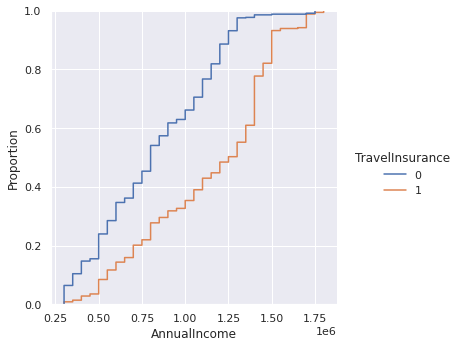

In [249]:
sns.displot(data= df , x= "AnnualIncome", kind="ecdf",hue="TravelInsurance")

In [363]:
data

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Customer ?,AnnualCat
0,31,Government Sector,1,400000,6,1,0,0,No,400000
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,No,1300000
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,Yes,500000
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,No,700000
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,No,700000
...,...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,1,1500000,4,0,1,1,Yes,1500000
1983,28,Private Sector/Self Employed,1,1750000,5,1,0,1,No,1800000
1984,28,Private Sector/Self Employed,1,1150000,6,1,0,0,No,1200000
1985,34,Private Sector/Self Employed,1,1000000,6,0,1,1,Yes,1000000


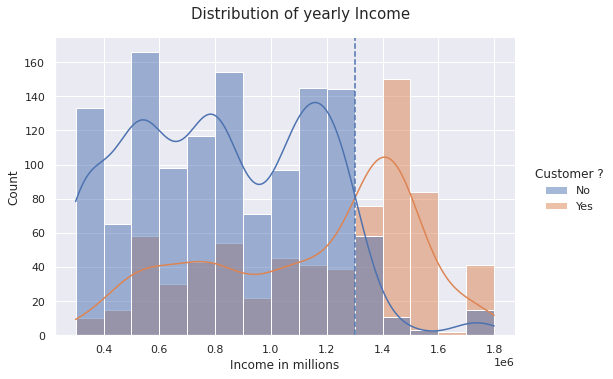

In [375]:
sns.set(rc= {"figure.figsize": (12, 8)})
data = df.copy()
data = data.rename(columns={"TravelInsurance":"Customer ?"})
data["Customer ?"].replace({1:"Yes", 0:"No"}, inplace=True)

plot=sns.displot(data= data , x= "AnnualIncome", kind="hist", kde=True, hue = "Customer ?",aspect=1.5)
plt.axvline ( 1300000, 0,1, color="b", linestyle="--")
#plt.axvline ( df.query('TravelInsurance ==1')["AnnualIncome"].mean(), 0,1, color="orange", linestyle="--")
plt.xlabel("Income in millions")
plot.fig.suptitle("Distribution of yearly Income ", fontsize =15 , y=1.05 )

plt.show()

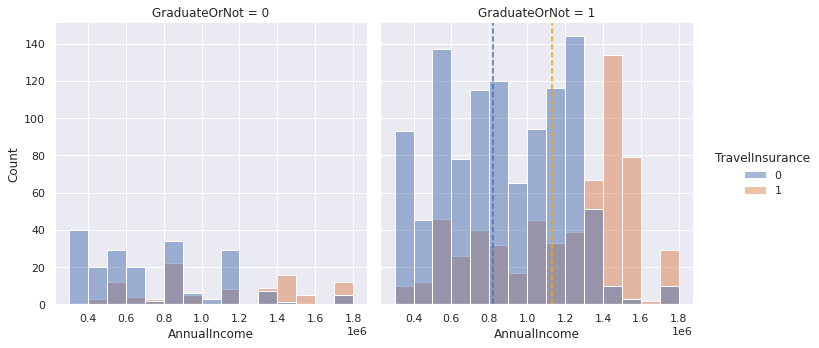

In [251]:
sns.displot(data= df , x= "AnnualIncome", kind="hist", kde=False, hue = "TravelInsurance", col="GraduateOrNot", col_wrap=2)
plt.axvline ( df.query('TravelInsurance ==0')["AnnualIncome"].mean(), 0,1, color="b", linestyle="--")
plt.axvline ( df.query('TravelInsurance ==1')["AnnualIncome"].mean(), 0,1, color="orange", linestyle="--")

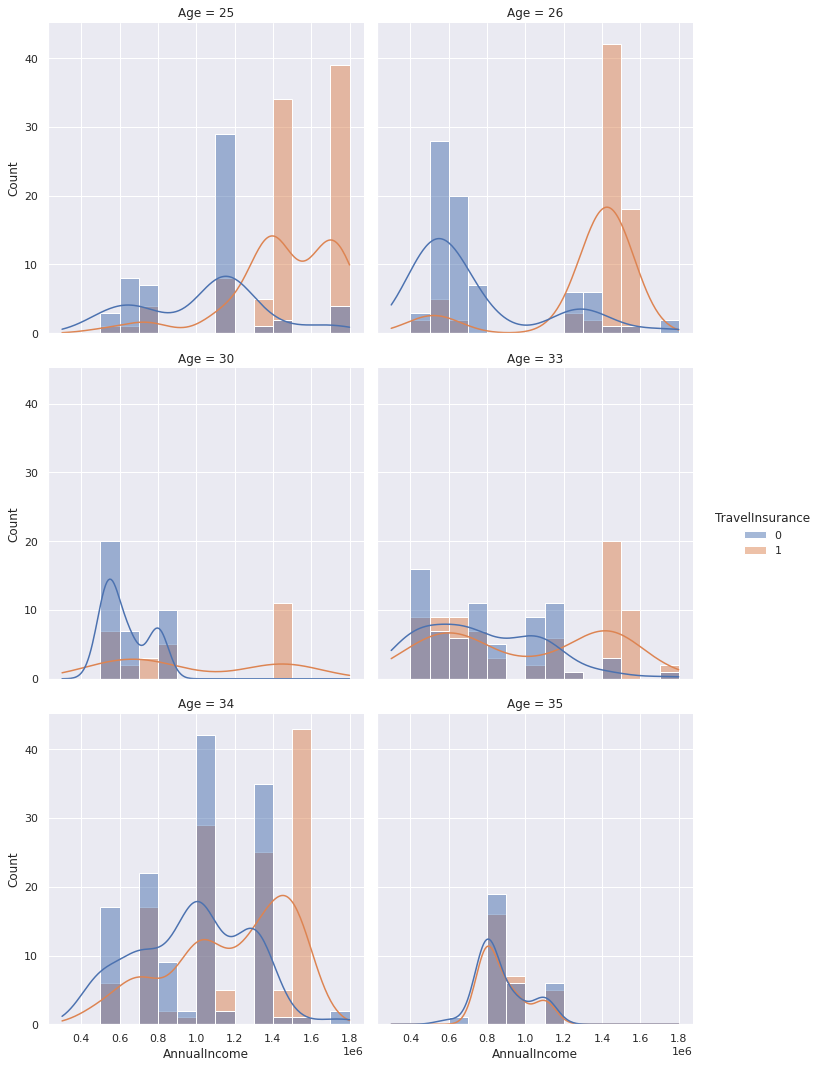

In [252]:
sns.displot(data= df , x= "AnnualIncome", kind="hist", kde=True, hue = "TravelInsurance", col="Age",col_order=ages, col_wrap=2)

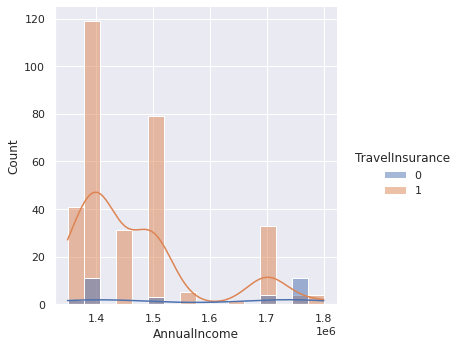

In [253]:
data = df.query('AnnualIncome > 1300000')
sns.displot(data= data , x= "AnnualIncome", kind="hist", kde=True, hue = "TravelInsurance")

In [254]:
print("Churn rate above 1,300,000 annual income :" ,round(df.query('AnnualIncome > 1300000')["TravelInsurance"].mean()*100,2), "%")
print("Churn rate bellow 1,300,000 annual income :" ,round(df.query('AnnualIncome < 1300000')["TravelInsurance"].mean()*100,2), "%")

Churn rate above 1,300,000 annual income : 91.12 %
Churn rate bellow 1,300,000 annual income : 23.08 %


In [255]:
print("Percentage of subjects above 1,300,000 annual income :" ,round(len(df.query('AnnualIncome > 1300000'))/len(df)*100,2),"%"  )

Percentage of subjects above 1,300,000 annual income : 17.56 %


In [256]:
label = [400000,500000,600000,700000,800000,900000,1000000,1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000]
df["AnnualCat"] = pd.cut(df.AnnualIncome,bins=15, labels=label )
data=df.groupby("AnnualCat").mean().reset_index().iloc[:,[0,-1]]

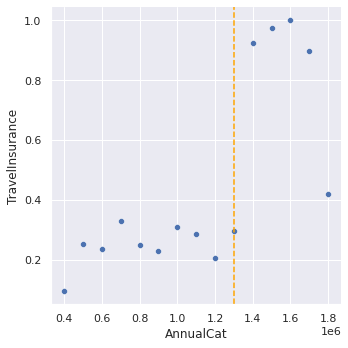

In [257]:
sns.relplot(data=data, x="AnnualCat", y="TravelInsurance", kind='scatter' )
plt.axvline ( 1300000, 0,1, color="orange", linestyle="--")



In [258]:
data = df.groupby("AnnualIncome").mean()["TravelInsurance"].reset_index().sort_values(by="TravelInsurance",ascending=False).head(10)
data

,AnnualIncome,TravelInsurance
29,1800000,1.000000
26,1650000,1.000000
25,1550000,1.000000
23,1450000,1.000000
24,1500000,0.963415
21,1350000,0.953488
22,1400000,0.915385
27,1700000,0.891892
20,1300000,0.384615
7,650000,0.366667


In [259]:
data = df[df.Age.isin(ages)].groupby(["Age", "AnnualIncome"]).mean()["TravelInsurance"].reset_index().sort_values(by="TravelInsurance",ascending=False).head(20)
data

,Age,AnnualIncome,TravelInsurance
17,26,1450000,1.000000
7,25,1750000,1.000000
23,30,750000,1.000000
37,33,1500000,1.000000
8,25,1800000,1.000000
25,30,1450000,1.000000
49,34,1500000,0.977273
16,26,1400000,0.972973
18,26,1500000,0.947368
5,25,1400000,0.944444


## Annual income Conclusions

High Income seems connected with the buying insurance. 

The conclusions is clear target people that earn more then 1,300,000 annualy that is only 17 % so the best recomendation might be to keep above 585,000 

## FamilyMembers

In [260]:
df.FamilyMembers.value_counts(normalize=True)

4    0.254152
5    0.214394
3    0.189733
6    0.147962
7    0.089582
2    0.046804
8    0.029693
9    0.027680
Name: FamilyMembers, dtype: float64

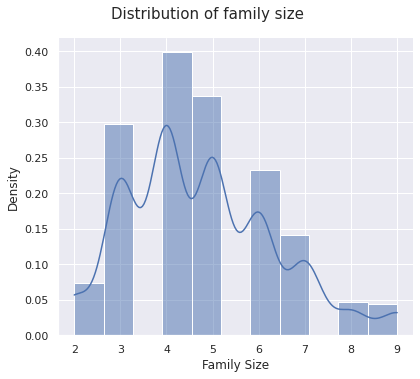

In [384]:
plot = sns.displot(data=df, x= "FamilyMembers", kind="hist", stat="density", kde=True, bins = 11,aspect=1.2 )
plot.fig.suptitle("Distribution of family size ", fontsize =15 , y=1.05 )
plt.xlabel("Family Size")
plt.show()



80% between 3-6 familly members living together

In [261]:
data =df.groupby("FamilyMembers").mean()[["TravelInsurance"]].sort_values(by="TravelInsurance",ascending=False)
data

,TravelInsurance
FamilyMembers,
9,0.472727
7,0.455056
6,0.438776
3,0.358090
8,0.355932
4,0.316832
5,0.307512
2,0.290323


In [262]:
data =df[df.Age.isin(ages)].groupby("FamilyMembers").mean()[["TravelInsurance"]].sort_values(by="TravelInsurance",ascending=False)
data

,TravelInsurance
FamilyMembers,
7,0.791045
6,0.747967
9,0.700000
8,0.600000
5,0.450262
4,0.439614
3,0.438272
2,0.289474


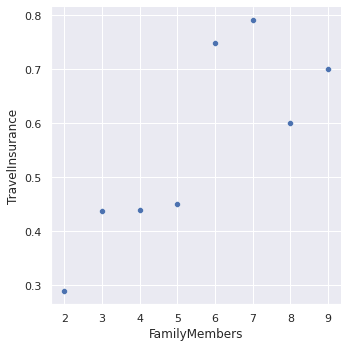

In [377]:
#data=df.groupby(["Age","FamilyMembers"]).mean()[["TravelInsurance"]].reset_index().sort_values(by="TravelInsurance",ascending=False).head(15)
data =df[df.Age.isin(ages)].groupby("FamilyMembers").mean()[["TravelInsurance"]].sort_values(by="TravelInsurance",ascending=False)

sns.relplot(data=data, x="FamilyMembers", y="TravelInsurance", kind="scatter")

In [378]:
data.reset_index(inplace=True)

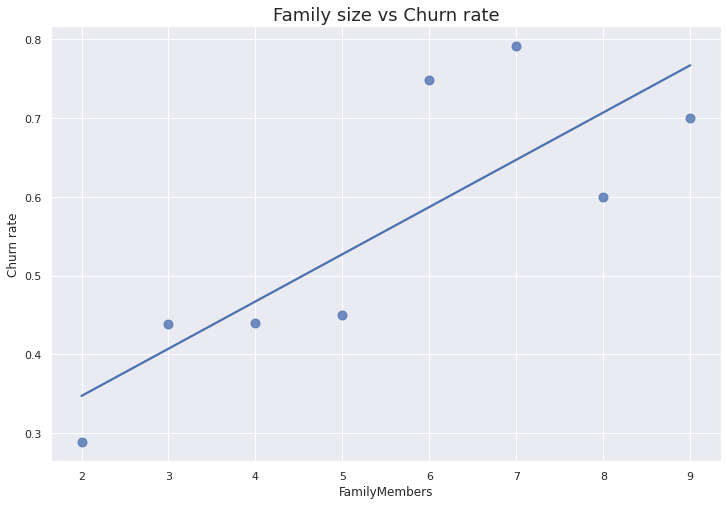

In [382]:
ax = sns.regplot(data=data, x="FamilyMembers", y="TravelInsurance", 
                 scatter_kws={"s": 80},order=1, ci=None )
plt.ylabel("Churn rate")
plt.title("Family size vs Churn rate", fontdict={"size":18})
plt.show()

In [264]:
data =df.groupby("FamilyMembers").mean()[["TravelInsurance"]].sort_values(by="TravelInsurance",ascending=False)

In [265]:
df[df.Age==25].groupby(["Age","FamilyMembers"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance",ascending=False).head(15)

TravelInsurance
Age FamilyMembers                 
25  9                     1.000000
    6                     0.850000
    7                     0.714286
    2                     0.666667
    4                     0.628571
    3                     0.583333
    5                     0.567568
    8                     0.250000

In [266]:
df[df.Age==26].groupby(["Age","FamilyMembers"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance",ascending=False).head(15)

TravelInsurance
Age FamilyMembers                 
26  9                     0.750000
    5                     0.647059
    4                     0.513514
    2                     0.500000
    7                     0.500000
    3                     0.433333
    6                     0.360000
    8                     0.000000

In [267]:
df[df.Age==33].groupby(["Age","FamilyMembers"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance",ascending=False).head(15)

TravelInsurance
Age FamilyMembers                 
33  7                     1.000000
    6                     0.875000
    8                     0.800000
    9                     0.800000
    3                     0.565217
    5                     0.424242
    4                     0.317073
    2                     0.111111

In [268]:
df[df.Age==34].groupby(["Age","FamilyMembers"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance",ascending=False).head(15)

TravelInsurance
Age FamilyMembers                 
34  8                     1.000000
    6                     0.928571
    7                     0.916667
    9                     0.666667
    4                     0.411765
    5                     0.312500
    3                     0.272727
    2                     0.230769

In [269]:
df[df.Age==35].groupby(["Age","FamilyMembers"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance",ascending=False).head(15)

TravelInsurance
Age FamilyMembers                 
35  7                     1.000000
    8                     1.000000
    6                     0.818182
    3                     0.500000
    9                     0.500000
    4                     0.285714
    5                     0.166667
    2                     0.000000

In [270]:
df[df.Age.isin(ages)].groupby(["EmploymentType","FamilyMembers"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False)

TravelInsurance
EmploymentType               FamilyMembers                 
Government Sector            7                     0.933333
                             8                     0.875000
                             9                     0.833333
Private Sector/Self Employed 6                     0.766990
                             7                     0.750000
Government Sector            6                     0.650000
Private Sector/Self Employed 9                     0.642857
                             4                     0.496894
                             5                     0.487500
                             8                     0.470588
                             3                     0.443609
Government Sector            3                     0.413793
Private Sector/Self Employed 2                     0.384615
Government Sector            5                     0.258065
                             4                     0.239130
                             2                     0.083333

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1987 non-null   int64   
 1   EmploymentType       1987 non-null   object  
 2   GraduateOrNot        1987 non-null   int64   
 3   AnnualIncome         1987 non-null   int64   
 4   FamilyMembers        1987 non-null   int64   
 5   ChronicDiseases      1987 non-null   int64   
 6   FrequentFlyer        1987 non-null   int64   
 7   EverTravelledAbroad  1987 non-null   int64   
 8   TravelInsurance      1987 non-null   int64   
 9   AnnualCat            1987 non-null   category
dtypes: category(1), int64(8), object(1)
memory usage: 142.5+ KB


In [271]:
df[df.Age.isin(ages)].groupby(["GraduateOrNot","EmploymentType","FamilyMembers"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False)

TravelInsurance
GraduateOrNot EmploymentType               FamilyMembers                 
1             Government Sector            7                     0.933333
                                           8                     0.875000
                                           9                     0.833333
              Private Sector/Self Employed 7                     0.815789
0             Private Sector/Self Employed 6                     0.774194
1             Private Sector/Self Employed 6                     0.763889
                                           8                     0.727273
                                           9                     0.700000
              Government Sector            6                     0.650000
0             Private Sector/Self Employed 7                     0.571429
1             Private Sector/Self Employed 4                     0.570175
                                           5                     0.517241
0             Private Sector/Self Employed 9                     0.500000
1             Private Sector/Self Employed 3                     0.494253
                                           2                     0.450000
              Government Sector            3                     0.413793
0             Private Sector/Self Employed 5                     0.409091
                                           3                     0.347826
                                           4                     0.319149
1             Government Sector            5                     0.258065
                                           4                     0.244444
0             Private Sector/Self Employed 2                     0.166667
1             Government Sector            2                     0.083333
0             Private Sector/Self Employed 8                     0.000000
              Government Sector            4                     0.000000

## Family conclusions

higher churn rates belong to family composed of 5 or more

## ChronicDiseases

In [272]:
df.ChronicDiseases.value_counts(normalize=True)

0    0.722194
1    0.277806
Name: ChronicDiseases, dtype: float64

In [273]:
df.groupby("ChronicDiseases").mean()[["TravelInsurance"]]

,TravelInsurance
ChronicDiseases,
0,0.351916
1,0.371377


In [274]:
df[df.Age.isin(ages)].groupby(["Age","ChronicDiseases"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False)

,,TravelInsurance
Age,ChronicDiseases,
25,0,0.672897
30,1,0.666667
33,1,0.638298
26,1,0.558140
34,1,0.540541
25,1,0.512821
35,1,0.500000
34,0,0.484375
26,0,0.476190


In [275]:
df[df.Age.isin(ages)].groupby(["GraduateOrNot","ChronicDiseases"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False)

TravelInsurance
GraduateOrNot ChronicDiseases                 
1             1                       0.593583
              0                       0.532438
0             1                       0.460000
              0                       0.409396

In [276]:
df[df.Age.isin(ages)].groupby(["EmploymentType","GraduateOrNot","ChronicDiseases"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False)

TravelInsurance
EmploymentType               GraduateOrNot ChronicDiseases                 
Private Sector/Self Employed 1             1                       0.637681
                                           0                       0.575758
Government Sector            1             1                       0.469388
Private Sector/Self Employed 0             1                       0.460000
                                           0                       0.412162
Government Sector            1             0                       0.410256
                             0             0                       0.000000

Chronic deseace improves

## FrequentFlyer 

In [277]:
df.FrequentFlyer.value_counts(normalize=True)

0    0.790136
1    0.209864
Name: FrequentFlyer, dtype: float64

In [278]:
df.groupby("FrequentFlyer").mean()[["TravelInsurance"]]

,TravelInsurance
FrequentFlyer,
0,0.300000
1,0.573141


In [279]:
df.groupby(["Age","FrequentFlyer"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False).head(10)

,,TravelInsurance
Age,FrequentFlyer,
35,1,0.888889
26,1,0.800000
34,1,0.740260
25,1,0.700000
31,1,0.666667
30,1,0.650000
33,1,0.615385
25,0,0.565789
33,0,0.508197


In [280]:
df.groupby(["EmploymentType","FrequentFlyer"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False).head(10)

,,TravelInsurance
EmploymentType,FrequentFlyer,
Private Sector/Self Employed,1,0.585714
Government Sector,1,0.507463
Private Sector/Self Employed,0,0.342081
Government Sector,0,0.210736


In [281]:
df.groupby(["FamilyMembers","FrequentFlyer"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False).head(10)

,,TravelInsurance
FamilyMembers,FrequentFlyer,
9,1,0.857143
7,1,0.657143
3,1,0.649351
6,1,0.619048
5,1,0.527273
4,1,0.520833
2,1,0.500000
9,0,0.416667
7,0,0.405594


In [282]:
df.groupby(["GraduateOrNot","EmploymentType","FrequentFlyer"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False).head(10)

TravelInsurance
GraduateOrNot EmploymentType               FrequentFlyer                 
1             Private Sector/Self Employed 1                     0.589286
0             Private Sector/Self Employed 1                     0.571429
1             Government Sector            1                     0.507463
              Private Sector/Self Employed 0                     0.345372
0             Private Sector/Self Employed 0                     0.325967
1             Government Sector            0                     0.230937
0             Government Sector            0                     0.000000

In [283]:
df.groupby(["GraduateOrNot","EmploymentType","FrequentFlyer"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False).head(10)

TravelInsurance
GraduateOrNot EmploymentType               FrequentFlyer                 
1             Private Sector/Self Employed 1                     0.589286
0             Private Sector/Self Employed 1                     0.571429
1             Government Sector            1                     0.507463
              Private Sector/Self Employed 0                     0.345372
0             Private Sector/Self Employed 0                     0.325967
1             Government Sector            0                     0.230937
0             Government Sector            0                     0.000000

In [284]:
data = df[df.Age.isin(ages) & df.FamilyMembers.isin([6,7,8,9])]

data.groupby(["GraduateOrNot","EmploymentType","FrequentFlyer"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False).head(10)

TravelInsurance
GraduateOrNot EmploymentType               FrequentFlyer                 
1             Private Sector/Self Employed 1                     0.885714
              Government Sector            1                     0.833333
                                           0                     0.790698
              Private Sector/Self Employed 0                     0.729167
0             Private Sector/Self Employed 1                     0.705882
                                           0                     0.578947

the difference between these 2 tables show that churn as improved 

## FrequentFlyer conclusion

yes imporves 

overall churn of 54 

about 70 %of sample

## EverTravelledAbroad

In [285]:
df.EverTravelledAbroad.value_counts(normalize=True)

0    0.808757
1    0.191243
Name: EverTravelledAbroad, dtype: float64

In [286]:
df.groupby("EverTravelledAbroad").mean()[["TravelInsurance"]]

,TravelInsurance
EverTravelledAbroad,
0,0.256378
1,0.784211


In [287]:
df.groupby(["Age","EverTravelledAbroad"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False).head(10)

,,TravelInsurance
Age,EverTravelledAbroad,
26,1,0.937500
25,1,0.862745
34,1,0.854839
31,1,0.822581
30,1,0.785714
33,1,0.761905
28,1,0.627907
29,1,0.571429
32,1,0.571429


In [288]:
df.groupby(["EmploymentType","EverTravelledAbroad"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False).head(10)

,,TravelInsurance
EmploymentType,EverTravelledAbroad,
Private Sector/Self Employed,1,0.811940
Government Sector,1,0.577778
Private Sector/Self Employed,0,0.275416
Government Sector,0,0.217143


In [289]:
df.groupby(["GraduateOrNot","EverTravelledAbroad"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False).head(10)

TravelInsurance
GraduateOrNot EverTravelledAbroad                 
1             1                           0.797654
0             1                           0.666667
              0                           0.285156
1             0                           0.250925

In [290]:
df.groupby(["EmploymentType","GraduateOrNot","EverTravelledAbroad"]).mean()[["TravelInsurance"]].sort_values(by="TravelInsurance", ascending=False).head(10)

TravelInsurance
EmploymentType               GraduateOrNot EverTravelledAbroad                 
Private Sector/Self Employed 1             1                           0.831081
                             0             1                           0.666667
Government Sector            1             1                           0.577778
Private Sector/Self Employed 0             0                           0.344340
                             1             0                           0.258621
Government Sector            1             0                           0.237006
                             0             0                           0.000000

## EverTravelledAbroad conclusion

yes is better

In [291]:
data_0 = df[df.Age.isin(ages) & df.FamilyMembers.isin([6,7,8,9])]
data_1= df[  (df.FrequentFlyer==1) & (df.EverTravelledAbroad==1)]

print(len(data_0))
print(len(data_1))

235
168


In [292]:

print(data_0.TravelInsurance.mean())
print(data_1.TravelInsurance.mean())

0.7404255319148936
0.8809523809523809


In [293]:
data_3= df[  (df.FrequentFlyer==0) & (df.EverTravelledAbroad==1)]
data_4= df[  (df.FrequentFlyer==1) & (df.EverTravelledAbroad==0)]
print(len(data_3))
print(len(data_4))

212
249


In [294]:
print(data_3.TravelInsurance.mean())
print(data_4.TravelInsurance.mean())

0.7075471698113207
0.3654618473895582


In [295]:
data_3 = df[   (df.Age.isin(ages) & df.FamilyMembers.isin([6,7,8,9]) )  | ((df.FrequentFlyer==1) & (df.EverTravelledAbroad==1))              ]

In [296]:
print(data_3.TravelInsurance.mean())
len(data_3)

0.7882037533512064


373

In [297]:
data_5 = df[ df.AnnualIncome >1300000  ]
print(len(data_5))
print(data_5.TravelInsurance.mean())

349
0.9111747851002865


In [298]:
data_6 = df[ df.AnnualIncome >1300000 ]
print(len(data_6)*100 /len(df),"%" )
print(data_6.TravelInsurance.mean())

17.564167086059385 %
0.9111747851002865


In [299]:
df.TravelInsurance.mean()

0.3573225968797182

In [300]:
data_7 = df[ df.Age.isin(ages) ]
data_8 = df[ df.FamilyMembers.isin([6,7,9]) ]


print(len(data_7)*100 /len(df),"%" )
print(data_7.TravelInsurance.mean())

print(len(data_8)*100 /len(df),"%" )
print(data_8.TravelInsurance.mean())

41.92249622546552 %
0.5198079231692677
26.522395571212883 %
0.4478178368121442


In [301]:
print(data_8[data_8.AnnualIncome >600000 ].TravelInsurance.mean())

0.5340314136125655


In [302]:
df[df.Age.isin(ages) & df.FamilyMembers.isin([6,7,8,9])]

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualCat
15,34,Private Sector/Self Employed,1,700000,7,0,0,0,0,700000
26,34,Private Sector/Self Employed,0,1300000,6,0,1,0,1,1300000
30,30,Private Sector/Self Employed,0,550000,6,0,1,1,0,600000
44,25,Private Sector/Self Employed,1,1400000,7,0,0,1,1,1400000
57,34,Private Sector/Self Employed,1,1000000,6,0,0,0,1,1000000
...,...,...,...,...,...,...,...,...,...,...
1954,30,Private Sector/Self Employed,0,550000,6,1,0,0,0,600000
1962,25,Private Sector/Self Employed,0,1150000,7,0,0,0,0,1200000
1975,26,Private Sector/Self Employed,1,1400000,9,0,0,1,1,1400000
1977,25,Private Sector/Self Employed,0,1350000,6,0,0,1,1,1400000


In [303]:
data_9 = df[df.Age.isin(ages)]

print(data_9.TravelInsurance.mean())
print(data_9[data_9.EmploymentType=="Government Sector"].TravelInsurance.mean())
print(data_9[data_9.EmploymentType !="Government Sector"].TravelInsurance.mean())

0.5198079231692677
0.4251497005988024
0.5435435435435435


In [304]:
print(data_4.TravelInsurance.mean())
print(data_4[data_4.EmploymentType=="Government Sector"].TravelInsurance.mean())
print(data_4[data_4.EmploymentType !="Government Sector"].TravelInsurance.mean())

0.3654618473895582
0.3829787234042553
0.3613861386138614


# CI 

In [305]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates.
				Size is the amount of bootstrap samples.
				Return a statistic from each a.k.a. bootstrap replicates"""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
      bs = np.random.choice(data, len(data))
      bs_replicates[i] = func(bs)

    return bs_replicates
   

**Age**

In [352]:
df.TravelInsurance.mean()

0.3573225968797182

In [306]:

x= df[df.Age.isin(ages)].TravelInsurance
bs_reps = draw_bs_reps(x, np.mean, size=1000)
print("Initial churn rate :" , round(df.TravelInsurance.mean()*100,2), "%")
print("New churn rate :" , round(x.mean()*100,2), "%")
print("CI :{}".format(np.percentile(bs_reps, [2.5,97.5])))

Initial churn rate : 35.73 %
New churn rate : 51.98 %
CI :[0.48619448 0.55345138]


**Emplotment**

In [307]:
x= df[df.EmploymentType!='Government Sector' ].TravelInsurance

bs_reps = draw_bs_reps(x, np.mean, size=1000)
print("Initial churn rate :" , round(df.TravelInsurance.mean()*100,2), "%")
print("New churn rate :" , round(x.mean()*100,2), "%")
print("95 % CI :{}".format(np.percentile(bs_reps, [2.5,97.5])))

Initial churn rate : 35.73 %
New churn rate : 40.23 %
95 % CI :[0.37826394 0.42768172]


**Graduate**

In [308]:
x= df[df.GraduateOrNot==1 ].TravelInsurance

bs_reps = draw_bs_reps(x, np.mean, size=1000)
print("Initial churn rate :" , round(df.TravelInsurance.mean()*100,2), "%")
print("New churn rate :" , round(x.mean()*100,2), "%")
print(" 95 % CI :{}".format(np.percentile(bs_reps, [2.5,97.5])))

Initial churn rate : 35.73 %
New churn rate : 36.11 %
 95 % CI :[0.3392435  0.38416076]


In [309]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_1)

    return diff


def draw_perm_reps(data1, data2, func, size=1):
  """Generate multiple permutation replicates."""
  # Initialize array of replicates: perm_replicates

  perm_replicates = np.empty(size)
  data = np.concatenate((data1,data2))
   

	# Permute the concatenated array: scramble (change the order)
  for i in range(size):
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    perm_replicates[i] = np.mean(perm_sample_1)-np.mean(perm_sample_2)
  return perm_replicates

In [310]:
y= df.TravelInsurance

In [311]:
perm_reps = draw_perm_reps(x, y, diff_of_means, size=10000)

In [312]:
np.sum(perm_reps >= x.mean() )/len(perm_reps)

0.0

**Annual Income**

In [313]:
x= df[df.AnnualIncome>1300000 ].TravelInsurance

bs_reps = draw_bs_reps(x, np.mean, size=1000)
print("Initial churn rate :" , round(df.TravelInsurance.mean()*100,2), "%")
print("New churn rate :" , round(x.mean()*100,2), "%")
print(" 95 % CI :{}".format(np.percentile(bs_reps, [2.5,97.5])))

Initial churn rate : 35.73 %
New churn rate : 91.12 %
 95 % CI :[0.88252149 0.94269341]


**Familymembers**

In [314]:
x= df[df.FamilyMembers.isin([6,7,8,9]) ].TravelInsurance

bs_reps = draw_bs_reps(x, np.mean, size=1000)
print("Initial churn rate :" , round(df.TravelInsurance.mean()*100,2), "%")
print("New churn rate :" , round(x.mean()*100,2), "%")
print(" 95 % CI :{}".format(np.percentile(bs_reps, [2.5,97.5])))

Initial churn rate : 35.73 %
New churn rate : 43.86 %
 95 % CI :[0.39761092 0.4778157 ]


**chornic**

In [391]:
x= df[df.ChronicDiseases==1 ].TravelInsurance
y= df.TravelInsurance
bs_reps = draw_bs_reps(x, np.mean, size=1000)
print("Initial churn rate :" , round(df.TravelInsurance.mean()*100,2), "%")
print("New churn rate :" , round(x.mean()*100,2), "%")
print(" 95 % CI :{}".format(np.percentile(bs_reps, [2.5,97.5])))

Initial churn rate : 35.73 %
New churn rate : 37.14 %
 95 % CI :[0.32971014 0.40946558]


In [316]:
perm_reps = draw_perm_reps(x, y, diff_of_means, size=100000)

In [317]:
np.sum(perm_reps >= x.mean() )/len(perm_reps)

0.0

In [318]:
perm_reps.sum()

0.5405855832946682

**FrequentFlyers**

In [319]:
x= df[df.FrequentFlyer==1 ].TravelInsurance

bs_reps = draw_bs_reps(x, np.mean, size=1000)
print("Initial churn rate :" , round(df.TravelInsurance.mean()*100,2), "%")
print("New churn rate :" , round(x.mean()*100,2), "%")
print(" 95 % CI :{}".format(np.percentile(bs_reps, [2.5,97.5])))

Initial churn rate : 35.73 %
New churn rate : 57.31 %
 95 % CI :[0.52517986 0.62110312]


**EverTravelledAbroad**

In [320]:

x= df[df.EverTravelledAbroad==1 ].TravelInsurance

bs_reps = draw_bs_reps(x, np.mean, size=1000)
print("Initial churn rate :" , round(df.TravelInsurance.mean()*100,2), "%")
print("New churn rate :" , round(x.mean()*100,2), "%")
print(" 95 % CI :{}".format(np.percentile(bs_reps, [2.5,97.5])))

Initial churn rate : 35.73 %
New churn rate : 78.42 %
 95 % CI :[0.74473684 0.82368421]


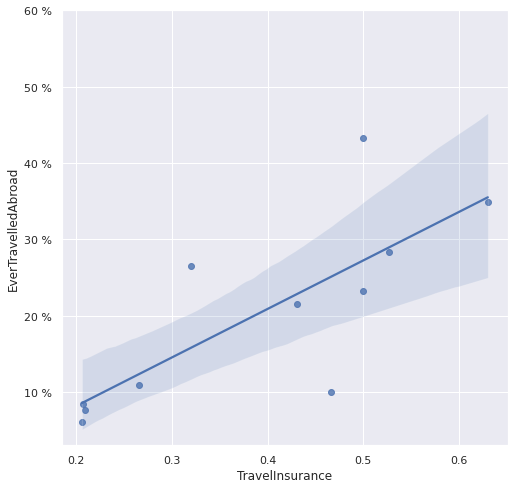

In [321]:
x = df.groupby("Age").count() / len(df)
y = df.groupby("Age").mean()

data = pd.concat(      [ x["GraduateOrNot"],y[["TravelInsurance","FrequentFlyer","EverTravelledAbroad"]]],axis=1    ).reset_index()
plot= sns.regplot(data=data,x="TravelInsurance", y = "EverTravelledAbroad")
#plot.fig.suptitle("Churn rate vs Representation             ", y=1.05)

plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],["10 %","20 %","30 %","40 %","50 %","60 %" ])
plt.show()